In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from pyjack21.game import BlackJackTable

In [6]:
player_count = 4
payroll = [1000000, 1000000, 1000000, 1000000]
table = BlackJackTable(hands=100000, decks=6, player_count=player_count, payroll=payroll)

In [7]:
table.run()

In [8]:
table.df

,dealer_card,dealer_hand,dealer_final_hand,payroll_0,hand_0,init_move_0,payroll_1,hand_1,init_move_1,payroll_2,...,hand_3,init_move_3,hand_earnings_0,hand_result_0,hand_earnings_1,hand_result_1,hand_earnings_2,hand_result_2,hand_earnings_3,hand_result_3
0,NaN,NaN,NaN,1000000.0,NaN,NaN,1000000.0,NaN,NaN,1000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,16,26,1000020.0,H9,D,1000010.0,H13,S,1000010.0,...,H12,S,20.0,W,10.0,W,10.0,W,10.0,W
2,K,20,20,1000000.0,H11,D,1000025.0,S21,BLACKJACK,1000010.0,...,H8,H,-20.0,L,15.0,W,0.0,P,-10.0,L
3,T,17,17,1000010.0,H18,S,1000035.0,H14,H,1000000.0,...,S20,S,10.0,W,10.0,W,-10.0,L,10.0,W
4,T,17,17,1000000.0,55,S,1000045.0,H20,S,1000010.0,...,H15,H,-10.0,L,10.0,W,10.0,W,0.0,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,8,18,18,982370.0,H16,H,984135.0,H18,S,982205.0,...,S13,H,10.0,W,0.0,P,-10.0,L,10.0,W
99997,6,17,17,982360.0,H13,S,984125.0,H12,S,982215.0,...,H9,D,-10.0,L,-10.0,L,10.0,W,20.0,W
99998,J,20,20,982350.0,S19,S,984115.0,H17,S,982225.0,...,S21,BLACKJACK,-10.0,L,-10.0,L,10.0,W,15.0,W
99999,J,15,24,982360.0,H16,H,984135.0,H11,D,982215.0,...,H17,S,10.0,W,20.0,W,-10.0,L,10.0,W


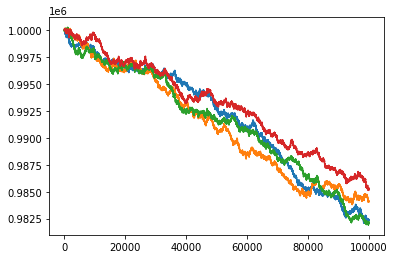

In [9]:
blackjack_data = table.df
for i in range(player_count):
    plt.plot(blackjack_data[f'payroll_{i}'])

In [10]:
def find_expected_value(hand):
    value_sum = 0
    hand_count = 0
    for i in range(player_count):
        data = blackjack_data[blackjack_data[f'hand_{i}'] == hand]
        value_sum = value_sum + data[f'hand_earnings_{i}'].sum()
        hand_count = hand_count + len(data[f'hand_earnings_{i}'])
    return value_sum/hand_count

In [30]:
find_expected_value('H9')

0.21687086325869595

In [37]:
hands = blackjack_data[f'hand_1'].unique()
hands = sorted(hands)
hand_data = pd.DataFrame()
for i in range(len(hands)):
    hand_data.loc[i, 'hand'] = hands[i]
    ev = find_expected_value(hands[i])
    hand_data.loc[i, 'ev'] = ev / 10 # expected value over bet size

In [58]:
pairs = ['NaN', '22', '33', '44', '55', '66', '77', '88', '99', 'TT', 'JJ', 'QQ', 'KK', 'AA']
for pair in pairs:
    hand_data = hand_data[hand_data['hand'] != pair]

<BarContainer object of 25 artists>

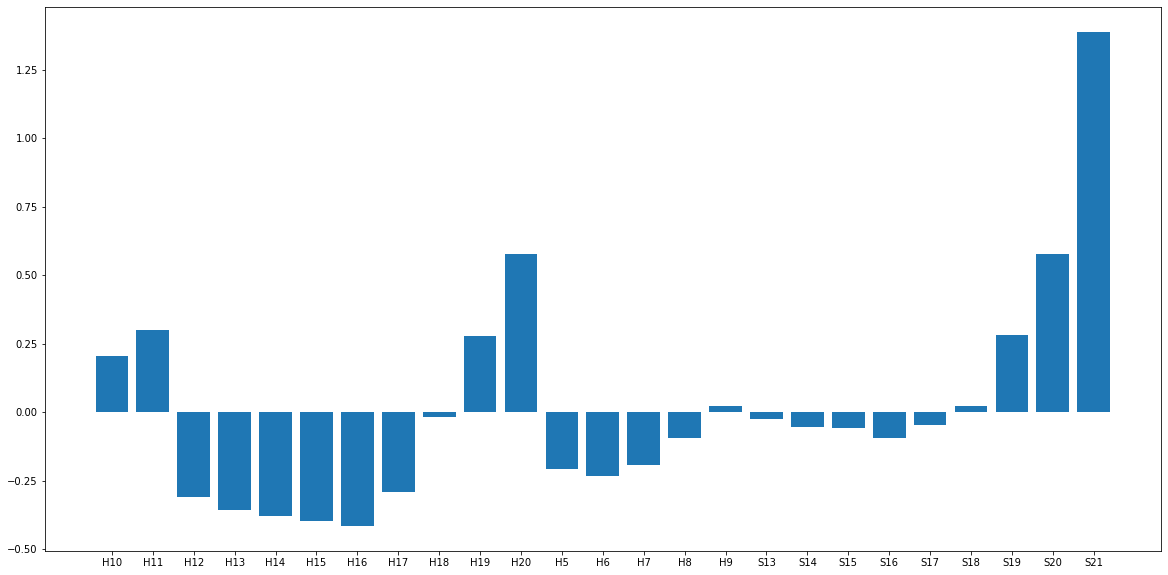

In [59]:
plt.figure(figsize=(20,10)) 
plt.bar(hand_data['hand'], hand_data['ev'])

In [61]:
blackjack_data.to_csv('blackjack.csv')